<center><font size="+4">Introduction to Programming and Machine Learning in Python 2020/2021</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 4: Control and Repetition Statements</font><br/></center>
<center><font size="+2"> and CSV manipulation/visualization applied on COVID-19 data</font></center>

---

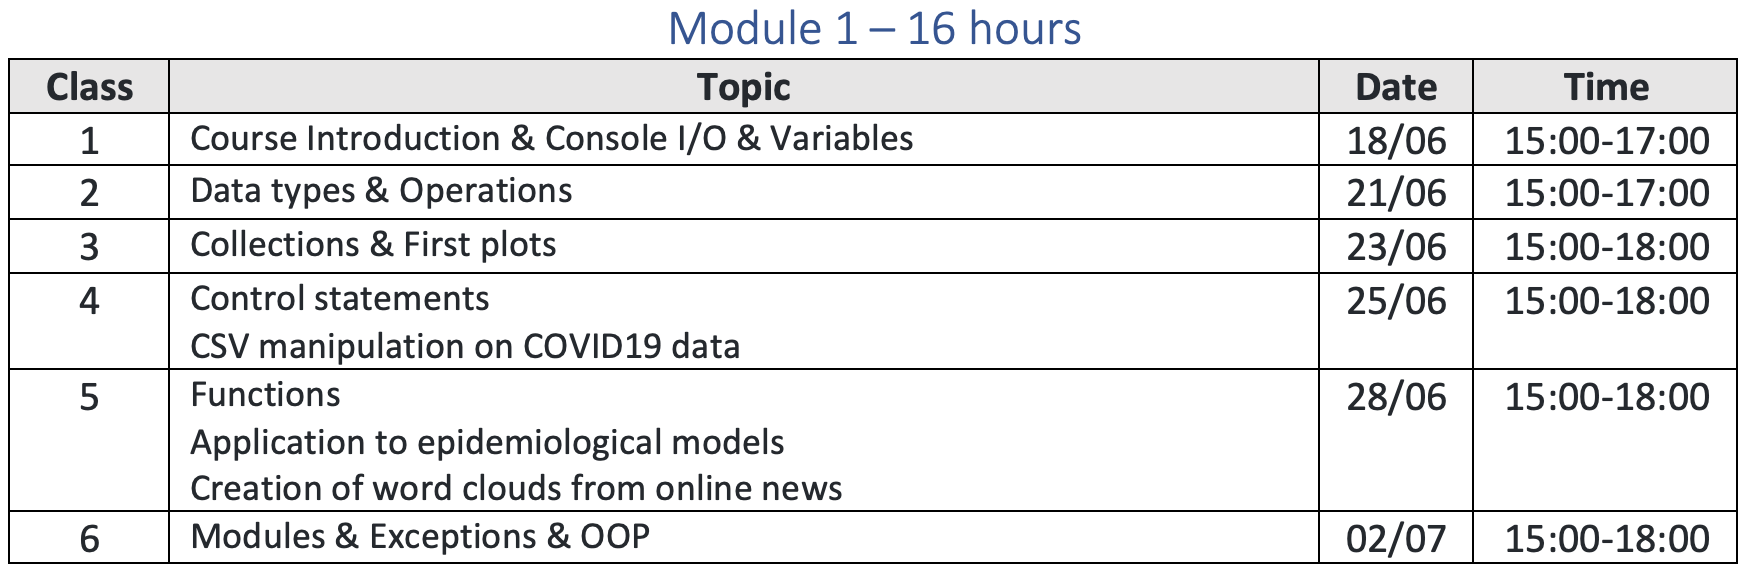

In [1]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/SNS-IProML2021/raw/main/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/tentativeLecturePlan.png',width=700)
display(img)

<font size="+2"> How good are we so far - Kahoot quiz on previous class </font>
* Using your phone or a different display go to [https://kahoot.it/](https://kahoot.it/)
* Type the given PIN

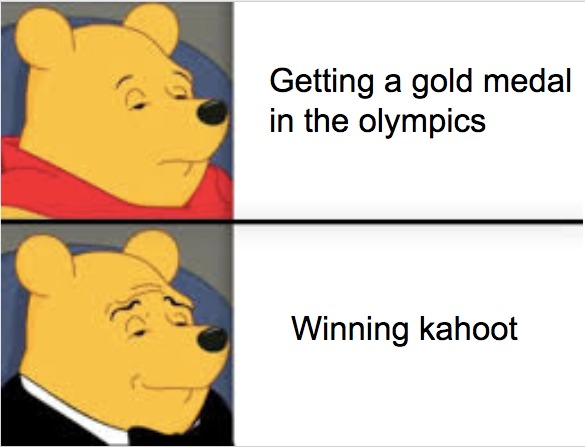

In [2]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/kahootPooh.jpeg',width=700)
display(img)

In [3]:
from IPython.display import IFrame
IFrame("https://kahoot.it/", 500, 400)

# Intro: we need to control at runtime the execution flow of our programs

## We don't precisely do cooking recipes

At the beginning of the course we made a parallel among cooking recipes and software programs.

* A recipe is a list of instructions to be executed in sequence. No decisions have to be taken.
* When programming, it is very rare to deal with problems that require only such simple processing. 

Most of the times we need to write programs able to take decisions:
* Depending on the input
* Depending on the current values of certain variables in the program

## Today

In this lecture we will discuss the specific statements (aka control and repetition structures) necessary to:
  * __IF__: Execute blocks of statements only if a certain condition holds
  * __LOOP__: Execute blocks of statements several times as long a certain condition holds 

Statements like `if` and loops (`while`, `for`) that contain _blocks of statements_
* are known as [__compound statements__](https://docs.python.org/3/reference/compound_stmts.html)
* affect/control the execution of those other statements in some way
* blocks are built using the _indentation rule_, as explained below. 
  * What matters are the spaces preceding a statement
  * No explicit block delimiters like `{...}` are needed

# If statement

This section presents the various forms in which we can use the [`if` statement](https://docs.python.org/3/reference/compound_stmts.html#the-if-statement)

## Choose whether executing a block or not

In its simplest form, an `if` statement consists of
* A guard: a Boolean expression (as presented in class 2 evaluated to either `True` or `False`
* A body: block of statements executed only if the guards evaluates to `True`

In [4]:
x=1
y=2
if x==y:
    print('The guard was satisfied')
print('After the first if\n')

x=1
y=1
if x==y :
    print('The guard was satisfied')
print('After the second if')

After the first if

The guard was satisfied
After the second if


> Pay attention to tabs/indentation! The body of the `if` is defined by the indentation <br/>
> The following prgram is equal to the first one above up to a tab, behaves differently!

In [5]:
x=1
y=2
if x==y :
    print('The guard was satisfied')
    print('Still in the if!')
print('Not in the if!')    

Not in the if!


## Choose which block to execute among two blocks

What if we need to choose between executing two blocks of statements according to a condition?

In [6]:
deposit = 10
withdraw = 6

if deposit >= withdraw :
    deposit-=withdraw
    print('Withdrawing',withdraw,'succeeded. ') 
    print('We are left with',deposit)
else:
    missing = withdraw - deposit 
    actualWithdraw = deposit
    deposit = 0
    print('Withdrawing',withdraw,'failed. ')
    print('We withdrew',actualWithdraw,'remaining with',deposit)

Withdrawing 6 succeeded. 
We are left with 4


In [7]:
if deposit >= withdraw :
    deposit-=withdraw
    print('Withdrawing',withdraw,'succeeded. ') 
    print('We are left with',deposit)
else:
    missing = withdraw - deposit 
    actualWithdraw = deposit
    deposit = 0
    print('Withdrawing',withdraw,'failed. ')
    print('We withdrew',actualWithdraw,'remaining with',deposit)

Withdrawing 6 failed. 
We withdrew 4 remaining with 0


> The copy-paste of code above is __bad practice__. We will see in the next class how to avoid it!

## Choose wich block to execute among several blocks

In [8]:
print('The cappuccino law.')
hour=int(input('What time is it (0-24)?'))
if hour < 5 :
    print('No. But some people have hot milk to help their sleep.')
elif hour <= 11 :
    print('You can safely have a cappuccino.')
elif hour == 12 :
    print("That's shady. Drink it quickly.")
elif hour <= 15 :
    print('No way!')
elif hour <= 20 :
    print('No. But you can have hot milk if you are sick.')
else:
    print("No. But some people have hot milk before going to sleep.")

The cappuccino law.


What time is it (0-24)? 3


No. But some people have hot milk to help their sleep.


There can be:
* 0, 1, or more `elif`
  * take this branch if previous guards failed and this one passes
* 0 or 1 `else`
  * a sort of _default_ case taken if all other guards fail

Of course, we can have nested `if`
* The `else` and `elif` are matched to the correct `if` according to the indentation rule

In [9]:
n=int(input())
if n >= 2 :
    if n <= 5 :
        print(n,'belongs to the interval [2,5]')
    else :
        print(n,'belongs to the interval (5,infinity)')
else :
    print(n,'belongs to the interval [0,2)')

 1


1 belongs to the interval [0,2)


# Looping constructs

A basic __`if`__ statement can be used to
* decide whether executing a block __0 times or 1 time__

A looping construct (__`while`__,__`for`__) is like a basic `if`, but can be used to
* decide whether executing a block __0 times, 1 time, 2 times, 3 times, 4 times ...__

## While loops

We begin from [while loops](https://docs.python.org/3/reference/compound_stmts.html#the-while-statement)
* showing how we can use them to compute the factorial of a number: $n! = n\cdot(n-1)\cdot(n-2)\cdot\ldots\cdot1$

In [10]:
nstr = input('Give me a (small) number. I will compute its factorial')
n=int(nstr)

fact=n
factstr=str(n)
while n >1:
    n-=1
    fact*=n 
    factstr = factstr + '*' + str(n)
print('The factorial of',nstr,'is',fact,'computed as',factstr)

Give me a (small) number. I will compute its factorial 3


The factorial of 3 is 6 computed as 3*2*1


Echo lines from console as long as the user does not type `'end'`

In [11]:
line = ''
while line != 'end':
    line = input('Next line:')
    print(line.upper())
print('Bye!')

Next line: end


END
Bye!


We can modify the execution flow within an iteration using
* `break` interrupts the current iteration and exits the loop
* `continue` interrupts the current iteration and go to the next iteration

Let's print only non-numeric strings until we get `'end'`

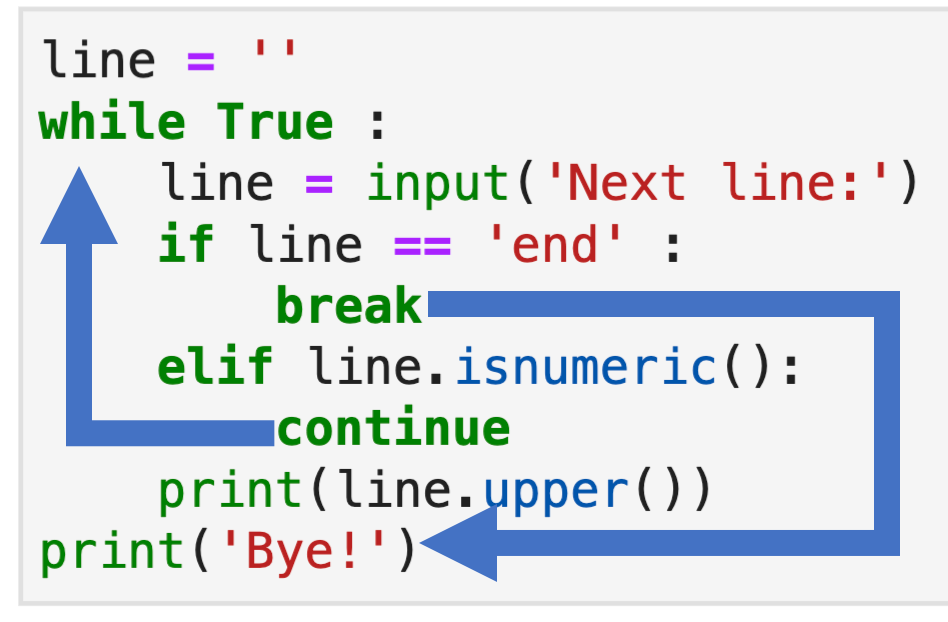

In [12]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/breakContinue.png',width=500)
display(img)

In [13]:
#Echo without printing `'end'`
line = ''
while True :
    line = input('Next line:')
    if line == 'end':
        break
    print(line.upper())
print('Bye!')

Next line: end


Bye!


In [12]:
#Echo without printing `'end'` and without printing numbers
line = ''
while True :
    line = input('Next line:')
    if line == 'end' :
        break
    elif line.isnumeric():
        continue
    print(line.upper())
print('Bye!')

Next line: end


Bye!


For pedagogical reasons, I gave solutions with `continue` and `break`. 
- In reality, I would have done it differently, using a more intuitive/simpler approach.

For example, we can get 'echo without printing `end`' by 
* just anticipating the first `input()` before the loop 
* moving the input inside the loop at the end of the loop: each iteration reads the value for the next iteration

> You should always think carefully on how to write your programs, always choosing the __simplest approach__.


In [13]:
#Echo without printing `'end'`
line = input('Next line:')
while line!='end' :
    print(line.upper())
    line = input('Next line:')
print('Bye!')

Next line: end


Bye!


While loops can have as well an `else` branch, 
* The block of the `else` branch is executed the first time the guard evaluates to `False`
    * but **it is not executed** if the cycle terminated due to a `break`
* I __discourage__ the use of this because 
  * It does not add much to the expressiveness
  * It is not particularly intuitive
  * Might lead to bugs: not executed if the loop terminates due to a `break`

In [14]:
#Echo without printing `'end'`
stop = False
while not stop :
    print('Loop body')
    stop = True
    #break
else :
    print('Else branch')
print('Bye!')

Loop body
Else branch
Bye!


## For loops

We now look at [`for` loops](https://docs.python.org/3/reference/compound_stmts.html#the-for-statement)
* They have pretty much the same expressive power of while loops, 
  * but make it easier the coding of certain computations
* They are useful when
  * you have to iterate over a collection
  * you know in advance the number `n` of iterations you need
    * You obtain this using the collection `range(n)`

### Basic usage

In [15]:
lst2=[0]*10
for i in range(10):
    lst2[i]=i*2
print(lst2)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [16]:
for c in 'ciao':
    print(c)

c
i
a
o


Intuitively, **a for loop is not so different from a list comprehension**
* But they are very different constructs. 
* List comprehensions can be used as an expression to be assigned.

In [17]:
rng = range(9)
lst = [i*2 for i in rng]
print(lst)

lst2=[]
for i in rng:
    lst2.append(i*2)
print(lst2)

[0, 2, 4, 6, 8, 10, 12, 14, 16]
[0, 2, 4, 6, 8, 10, 12, 14, 16]


Rule of thumb: 
* Whenever you do simple iterations on the elements of a collection to create a new one 
  * __use list comprehensions__. They are more efficient!
* Whenever you have to do more operations, e.g. execute more statements in each iteration
  * use for loops

In [18]:
for i in range(10):
    print('Hello')
    print('How are you?')
    print('...')
    print('The square of',i,'is',i**2)

Hello
How are you?
...
The square of 0 is 0
Hello
How are you?
...
The square of 1 is 1
Hello
How are you?
...
The square of 2 is 4
Hello
How are you?
...
The square of 3 is 9
Hello
How are you?
...
The square of 4 is 16
Hello
How are you?
...
The square of 5 is 25
Hello
How are you?
...
The square of 6 is 36
Hello
How are you?
...
The square of 7 is 49
Hello
How are you?
...
The square of 8 is 64
Hello
How are you?
...
The square of 9 is 81


### Nested loops

Let's create a 3x3 matrix containing random values from 0 to 1

In [19]:
import random
for i in range(10):
    print(random.random())

0.6603670311019308
0.505402309107082
0.033672808677953525
0.08443810873923141
0.37795629138524633
0.004245322522355988
0.5239938059088295
0.9217685246674499
0.814311177041781
0.787265313190312


In [20]:
import random
n_rows = 3
n_cols = 3

matrix = [ [ random.random() for c in range(n_cols) ] for r in range(n_rows) ]
print(matrix)
print()

#Let's pretty-print the created matrix
for r in range(n_rows) :
    for c in range(n_cols) :
        val = '{:.2f}'.format(matrix[r][c])
        print(val,end="")
    print()
#help(print)

[[0.03659944824972994, 0.8203631129565118, 0.02199738546014207], [0.6103419212365513, 0.733487233933469, 0.805889001635632], [0.7805289226525081, 0.45010005356397265, 0.306326658835696]]

0.040.820.02
0.610.730.81
0.780.450.31


In [37]:
#Let's compute some quantities on the matrix
maxm=-1 #the maximum value
minm=2  #the minimum value
summ=0  #the sum of the values in the matrix
for r in range(n_rows) :
    for c in range(n_cols) :
        if matrix[r][c] > maxm :
            maxm = matrix[r][c]
        if matrix[r][c] < minm :
            minm = matrix[r][c]
        summ+=matrix[r][c]

print(f'Sum {summ:.2f}, Min {minm:.4f}, Max {maxm}')
print('Sum {:.2f}, Min {:.4f}, Max {}'.format(summ,minm,maxm))

Sum 4.89, Min 0.2476, Max 0.9246369680694065
Sum 4.89, Min 0.2476, Max 0.9246369680694065


Did you notice
- `f'Sum {summ}, Min {minm}, Max {maxm}'`
- `'Sum {}, Min {}, Max {}'.format(summ,minm,maxm)`

These are examples of __string formatting__
- It can be convenient. [Take a look at further options](https://realpython.com/python-string-formatting/)

### Iterating over more collections at once ...

In [38]:
numbers="12345"
vowels="aeiou"
for (n,v) in zip(numbers,vowels):
    print(n,v)

1 a
2 e
3 i
4 o
5 u


### Two subtleties on the `for` loop

Two subtleties on the `for` loop from [here](https://docs.python.org/3/reference/compound_stmts.html#the-for-statement)
* In my opinion it is not good practice to use these two features below, but you have to know about them to defend against them ;)
* In particular, you should __avoid 2__. It makes the code much more difficult to read and debug

In [39]:
print('Subtlety 1: update the value of the iterating variable')
for i in range(1,4):
    print(i)
    i = i*i
    print('Square value is',i)
    print()

Subtlety 1: update the value of the iterating variable
1
Square value is 1

2
Square value is 4

3
Square value is 9



As you can see
* We can modify the variable `i` in an iteration. But this does not affect the next iterations: a new value will be assigned to `i` by the loop.
* You should better use a different ad-hoc variable
    

In [41]:
print('Subtlety 2: modifiy the list on which you are iterating')
#DON"T DO THIS!
lst = [1,2,3,4]
for i in lst :
    print(i)
    if i==2:
        lst.remove(i)    
print("NEVER DO SOMETHING LIKE THIS!!! \nOr you will regret it when spending hours trying to debug/understand your code.\n")

Subtlety 2: modifiy the list on which you are iterating
1
2
4
NEVER DO SOMETHING LIKE THIS!!! 
Or you will regret it when spending hours trying to debug/understand your code.



Did you notice what happened?
* The element `3` has been skipped. Why?
* Because it is after the element we removed. Ok, but why?
* Because: 
  * The `for` loop has an internal counter to remember the current position in the list it is iterating.
  * When we removed `2`, `3` got the position in the list previously occupied by `2`
  * Therefore the `for` loop erroneously believed to have already processed `3` and went to the next element (`4`).

Similarly to the `while` statement, the `for` supports
* `continue`
* `break`
* `else`

# How is it going with our remote setting?
Meanwhile at last week G7...

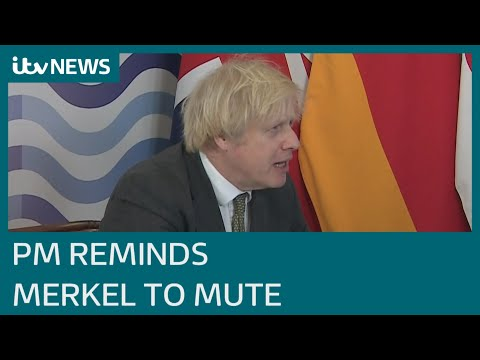

In [5]:
from IPython.display import Audio,Image, YouTubeVideo
id='_g6jAnLD2r0' #https://www.youtube.com/watch?v=_g6jAnLD2r0&ab_channel=ITVNews
YouTubeVideo(id=id,width=600,height=300)

# Application to the official Italian COVID-19 data

You might know that Protezione Civile publishes everyday data on the status of the COVID-19 epidemy in Italy

In [23]:
from IPython.display import IFrame
IFrame("http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1", 900, 700)

By following the 'CSV' link in the bottom-right of the page, we can download several data in CSV format.
* For example, [this link](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv) points to the latest information at national level

We are going to see next how `if` and `loops` can be used to perform easy manipulations on these data. 
* For easiness of distribution of this document, we downloaded a copy of this file updated on 
  * Friday the 8th of May 2020
    * The file is available [here](csv/covid19/dpc-covid19-ita-andamento-nazionale.csv). 
  * Friday the 26th of February 2021
    * The file is available [here](csv/covid19/dpc-covid19-ita-andamento-nazionale_26_02_2021.csv).  
* If you follow these links, jupyter will provide a nice rendering
* For pedagogical reasons, we will not use yet advanced libraries for loading and manipulating this data 
  * This will make more evident the role of `if` and `for`, and how to read files
  * This is good to help you understanding that there is no magic in programming

## Import the necessary modules

First of all, we need to import two required libraries. 
* The first time you run this code, you might need to install these libraries

In [48]:
#import sys
#!{sys.executable} -m pip install matplotlib

In [49]:
import csv
import matplotlib.pyplot as plt

In particular
* `csv` is a Python library offering functionalities to load CSV files. Find more [here](https://docs.python.org/3/library/csv.html)
* `matlplotlib` is a Python library for creating plots. Find more [here](https://matplotlib.org/)
   * We already used this library in the previous class

## Load the data of interest

In [109]:
#fileName='csv/covid19/dpc-covid19-ita-andamento-nazionale.csv'
fileName='csv/covid19/dpc-covid19-ita-andamento-nazionale_26_02_2021.csv'

#I want to 'open' a csvfile to 'r'ead it
#  For the time being, ignore the with statement. 
#  Assume it does: csvfile = open(fileName, 'r')
#  I will tell you more on this in two classes from now
with open(fileName, 'r') as csvfile:
    #Intuitively, 
    #  `csv` allows us to read csv files row by row.
    #  `rows` is a list of rows in the file. 
    #   Each row is in turn a list of strings containing one entry per column
    rows = csv.reader(csvfile, delimiter=',')
    
    #We load the header of the file in the list `header`
    header = next(rows,None)
    #print(header)
    
    #Let's get the data of interest ... using 3 approaches
    labels_of_interest = ['terapia_intensiva', 'totale_casi'   , 'totale_positivi'   , 'tamponi'  ]
    labels_en =          ['Intensive care'   , 'Total infected', 'Currently infected', 'Swab/tests']
    
    #1) Using a for loop
    label_to_column = dict()
    column = 0
    for label in header :
        if label in labels_of_interest:
            #I have found a label of interest
            label_to_column[label]=column
            #We exit the loop as soon as we have considered all labels of interest
            if len(label_to_column) == len(labels_of_interest) :
                break
        column += 1
    #print(label_to_column)
    
    #2) Using a while loop
    label_to_column2 = dict()
    column = 0
    while len(label_to_column2) != len(labels_of_interest) :
        label = header[column]
        if label in labels_of_interest:
            label_to_column2[label]=column
        column+=1
    #print(label_to_column2)
    
    #3) Using dictionary comprehension
    label_to_column3 = { label : header.index(label) for label in header if label in labels_of_interest }
    #print(label_to_column3)  
    
    #print(label_to_column==label_to_column2==label_to_column3)
    
    
    #We now iterate over all rows to load the data
    intensive_care = []
    total_infected = []
    currently_infected = []    
    tests = []
    #We put these lists in another list to simplify the for loop below
    loadedData = [intensive_care,total_infected,currently_infected,tests]

    for row in rows :
        l=0
        for label in labels_of_interest:
            column = label_to_column[label]
            data = row[column]
            loadedData[l].append(int(data))
            l+=1

#print(intensive_care)
#print(total_infected)
#print(tests)

## Populate the plots

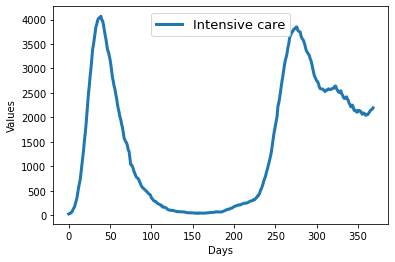

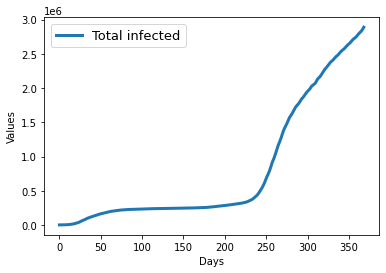

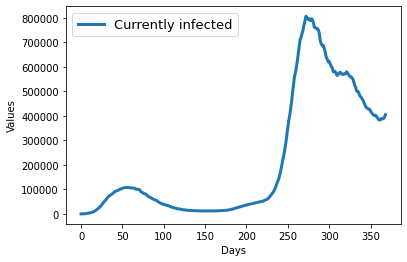

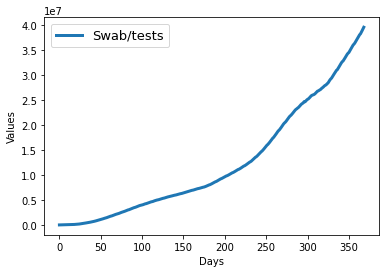

In [110]:
#We now create three plots
x = range(len(intensive_care))

for i in range(len(labels_en)) :
    plt.plot(x,loadedData[i], label=labels_en[i],linewidth=3)
    #plt.plot(x,intensive_care, label='Intensive care',linewidth=3)
    #plt.plot(x,total_infected, label='Total infected',linewidth=3)
    #plt.plot(x,currently_infected, label='Currently infected',linewidth=3)
    #plt.plot(x,tests, label='Swab/tests',linewidth=3)

    plt.legend(fontsize=13)
    plt.xlabel('Days')
    plt.ylabel('Values')

    #plt.savefig('Italian COVID-19 data',bbox_inches='tight')
    plt.show()
    
#plt.show()    

## Navigate data to compute new data of interest

In [111]:
peak_infected = max(currently_infected)
day_of_peak = currently_infected.index(peak_infected)
print('This data spans',len(currently_infected),'days.')
print('On day',day_of_peak,'we had had the peak of infected:',peak_infected)
print('Therefore we reached the peak',len(currently_infected)-day_of_peak,'days ago')
print('\tActually',len(currently_infected)-day_of_peak,' days before the latest measured day in the CSV')
print('On the last measured day we have',currently_infected[len(currently_infected)-1],'currently infected people')

This data spans 369 days.
On day 272 we had had the peak of infected: 805947
Therefore we reached the peak 97 days ago
	Actually 97  days before the latest measured day in the CSV
On the last measured day we have 404664 currently infected people


Let's show this information **graphcially**

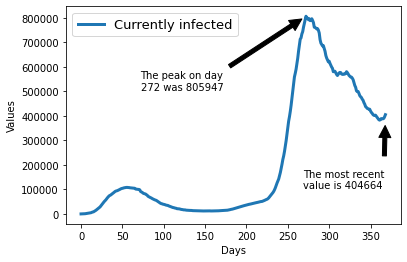

In [113]:
plt.plot(x,currently_infected, label='Currently infected',linewidth=3)
plt.legend(fontsize=13)
plt.xlabel('Days')
plt.ylabel('Values')
#plt.savefig('Italian COVID-19 data',bbox_inches='tight')

msg='The peak on day\n'+str(x[day_of_peak])+" was "+str(currently_infected[day_of_peak])
plt.annotate(msg, xy=(x[day_of_peak], currently_infected[day_of_peak]), 
                 xytext=(x[day_of_peak]-200, currently_infected[day_of_peak]-300000),
                 arrowprops=dict(facecolor='black', shrink=0.05))

last = len(currently_infected)-1
msg='The most recent\nvalue is '+str(currently_infected[last])
plt.annotate(msg, xy=(x[last], currently_infected[last]), 
                  xytext=(x[last]-100, currently_infected[last]-300000),
                  arrowprops=dict(facecolor='black', shrink=0.2))

plt.show()

What if we are interested in the **daily variation of infected**?
* In absolute value
* In percentage

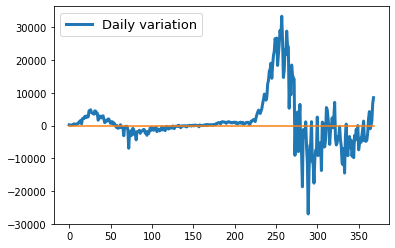

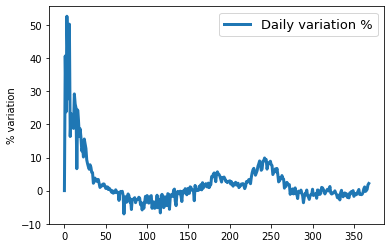

In [114]:
prevDay=0
daily_variation=[]
daily_variation_perc=[]
for i in range(len(currently_infected)) :
    difference = currently_infected[i] - prevDay
    daily_variation.append(difference)
    if(prevDay==0):
        daily_variation_perc.append(0)
    else:
        daily_variation_perc.append(difference/prevDay*100)
    prevDay=currently_infected[i]
#print(daily_variation)    
#print(daily_variation_perc)
    
plt.plot(x,daily_variation, label='Daily variation',linewidth=3)
plt.plot(x,[0]*len(x))
plt.legend(fontsize=13)
plt.show()

plt.plot(x,daily_variation_perc, label='Daily variation %',linewidth=3)
plt.ylabel('% variation')
plt.legend(fontsize=13)
plt.show()

What if we are interested in the
* **daily variation after the peak**?

Well, luckily we know how to obtain subsuquences...

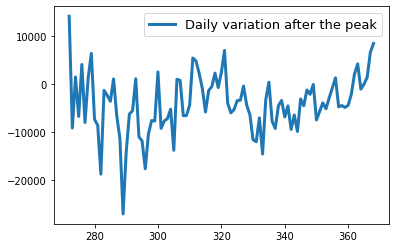

In [115]:
plt.plot(x[day_of_peak:],daily_variation[day_of_peak:], label='Daily variation after the peak',linewidth=3)
plt.legend(fontsize=13)
plt.show()

# Next class...

At the beginning of this class we have seen a clear example of __spaghetti code__

In [116]:
deposit = 20
withdraw = 7

if deposit >= withdraw :
    deposit-=withdraw
    print('Withdrawing',withdraw,'succeeded. ') 
    print('We are left with',deposit)
else:
    missing = withdraw - deposit 
    actualWithdraw = deposit
    deposit = 0
    print('Withdrawing',withdraw,'failed. ')
    print('We withdrew',actualWithdraw,'remaining with',deposit)
print()
    
    
if deposit >= withdraw :
    deposit-=withdraw
    print('Withdrawing',withdraw,'succeeded. ') 
    print('We are left with',deposit)
else:
    missing = withdraw - deposit 
    actualWithdraw = deposit
    deposit = 0
    print('Withdrawing',withdraw,'failed. ')
    print('We withdrew',actualWithdraw,'remaining with',deposit)
print()    
    
if deposit >= withdraw :
    deposit-=withdraw
    print('Withdrawing',withdraw,'succeeded. ') 
    print('We are left with',deposit)
else:
    missing = withdraw - deposit 
    actualWithdraw = deposit
    deposit = 0
    print('Withdrawing',withdraw,'failed. ')
    print('We withdrew',actualWithdraw,'remaining with',deposit)    
print()    

Withdrawing 7 succeeded. 
We are left with 13

Withdrawing 7 succeeded. 
We are left with 6

Withdrawing 7 failed. 
We withdrew 6 remaining with 0



Did you notice that we copy-pasted several times the same `if-else` statement?
This is very bad because:
* It makes the code less readable
* It makes the code less manutenable
  * What if you have to change something in the if-else statement?
  * You would have to modify each copy... which is very error-prone

Solution: declare a new function!

In [117]:
def withdraw_amoount(deposit,withdraw):
    if deposit >= withdraw :
        deposit-=withdraw
        print('Withdrawing',withdraw,'succeeded. ') 
        print('We are left with',deposit)
    else:
        missing = withdraw - deposit 
        actualWithdraw = deposit
        deposit = 0
        print('Withdrawing',withdraw,'failed. ')
        print('We withdrew',actualWithdraw,'remaining with',deposit)
    print()
    return deposit

deposit = 20
withdraw = 7

deposit = withdraw_amoount(deposit,withdraw)
deposit = withdraw_amoount(deposit,withdraw)
deposit = withdraw_amoount(deposit,withdraw)

Withdrawing 7 succeeded. 
We are left with 13

Withdrawing 7 succeeded. 
We are left with 6

Withdrawing 7 failed. 
We withdrew 6 remaining with 0



Furthermore, functions, or libraries (collections of functions and types) can be declared in different files, maintaining your code
* simple
* modular
* manutenable